# FINAL ASSESEMENT. Introduction to data Science with Python


## PART A : Understanding the Sources of Happiness

(datasets used: all 2 CSV files - World Happiness Report_2015 and World_Happiness Report_2019.csv)

Context:
The 'World Happiness Report' dataset is a comprehensive collection of data that measures happiness levels in different countries worldwide. It provides valuable insights into the factors that contribute to happiness and offers a global perspective on well-being. The dataset includes various variables that assess economic indicators, social support, health, freedom, trust, and generosity, among other factors. With observations spanning multiple years, it allows for temporal analysis and identification of happiness trends across different countries.

Each entry in the dataset represents a specific country and contains a wealth of information for comparative analysis. Researchers, policymakers, and individuals interested in understanding happiness levels can leverage this dataset to explore the underlying factors and their variations across different regions. By analysing the World Happiness Report dataset, one can gain insights into the determinants of happiness and uncover potential strategies to promote well-being and enhance the quality of life worldwide.

To perform the analysis, I  downloaded the two CSV files corresponding to the years 2015 and 2019 into this Jupyter Notebook. These datasets will provide the necessary data to answer the questions and gain a comprehensive understanding of happiness trends and influencing factors across different years.




### Before  answering the questions followed lets  import all required libraries and understand the nature of data by loaing into dataframe object



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Loading data into dataframe using pandas library

data_2015 = pd.read_csv('./12.1_World_Happiness_Report_2015.csv')
data_2019 = pd.read_csv('./12.1_World_Happiness_Report_2019.csv')


In [5]:
# Lets read first few rows of data for the year 2015
data_2015.head()


,Country,Region,Happiness Score,GDP per capita,Social support,Health (Life Expectancy),Freedom,Perceptions of corruption,Generosity
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [6]:
# lets check the columns present in this dataset

data_2015.columns

Index(['Country', 'Region', 'Happiness Score', 'GDP per capita',
       'Social support', 'Health (Life Expectancy)', 'Freedom',
       'Perceptions of corruption', 'Generosity'],
      dtype='object')

In [7]:
# lets read first few rows of data for year 2019

data_2019.head()

,Country or region,Happiness Score,GDP per capita,Social support,Health (Life Expectancy),Freedom,Perceptions of corruption,Generosity
0,Finland,7.769,1.340,1.587,0.986,0.596,0.393,0.153
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.410,0.252
2,Norway,7.554,1.488,1.582,1.028,0.603,0.341,0.271
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.118,0.354
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.298,0.322


## 1) Identify and describe the types of variables present in the World Happiness Report dataset. Categorize each variable as discrete, categorical, ordinal, or continuous.

### Ans. Based on the dataset Each variable can be categorized as; 

Categorical Variable: Country or region

Continuous Variables: Happiness Score, GDP per capita, Social support, Health (Life Expectancy), Freedom, Perceptions of corruption, Generosity

## 2) Calculate the mean, median, variance, and standard deviation for each continuous variable in the dataset for 2015 and 2019.


In [8]:
# Since both dataset has same variables
continuous_vars = ['Happiness Score', 'GDP per capita', 'Social support', 'Health (Life Expectancy)', 'Freedom', 'Perceptions of corruption', 'Generosity']

# Lets create a function that will calculate statistics for both the year by taking two arguments for each year: the dataframe and our continuous variable defined above
def data_statistics(df, variables):
    stats = {}
    for var in variables:
        stats[var] = {
            'mean': df[var].mean(),
            'median': df[var].median(),
            'variance': df[var].var(),
            'std_dev': df[var].std()
        }
    return pd.DataFrame(stats)

# Calculate statistics for 2015
stats_2015 = data_statistics(data_2015, continuous_vars)

print("Statistics for 2015:")
stats_2015


Statistics for 2015:


,Happiness Score,GDP per capita,Social support,Health (Life Expectancy),Freedom,Perceptions of corruption,Generosity
mean,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296
median,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130
variance,1.311048,0.162506,0.074185,0.061047,0.022708,0.014408,0.016049
std_dev,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685


In [9]:
# By calling same function that we created in previous cell we Calculate statistics for 2019 as well

stats_2019 = data_statistics(data_2019, continuous_vars)
print("\nStatistics for 2019:")

stats_2019



Statistics for 2019:


,Happiness Score,GDP per capita,Social support,Health (Life Expectancy),Freedom,Perceptions of corruption,Generosity
mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.110603,0.184846
median,5.379500,0.960000,1.271500,0.789000,0.417000,0.085500,0.177500
variance,1.239036,0.158714,0.089515,0.058624,0.020532,0.008937,0.009073
std_dev,1.113120,0.398389,0.299191,0.242124,0.143289,0.094538,0.095254


In [10]:
stats_2019.corr()

,Happiness Score,GDP per capita,Social support,Health (Life Expectancy),Freedom,Perceptions of corruption,Generosity
Happiness Score,1.000000,0.960659,0.985844,0.970353,0.958487,0.576420,0.894549
GDP per capita,0.960659,1.000000,0.993551,0.998970,0.999942,0.752676,0.978078
Social support,0.985844,0.993551,1.000000,0.997102,0.992561,0.684426,0.952202
Health (Life Expectancy),0.970353,0.998970,0.997102,1.000000,0.998437,0.722118,0.967687
Freedom,0.958487,0.999942,0.992561,0.998437,1.000000,0.759624,0.980244
Perceptions of corruption,0.576420,0.752676,0.684426,0.722118,0.759624,1.000000,0.873181
Generosity,0.894549,0.978078,0.952202,0.967687,0.980244,0.873181,1.000000


## 3) Create a separate line plot for each continuous variable, showing the temporal evolution of the mean from 2015 to 2019. Each plot should have the year on the x-axis and the mean on the y-axis.



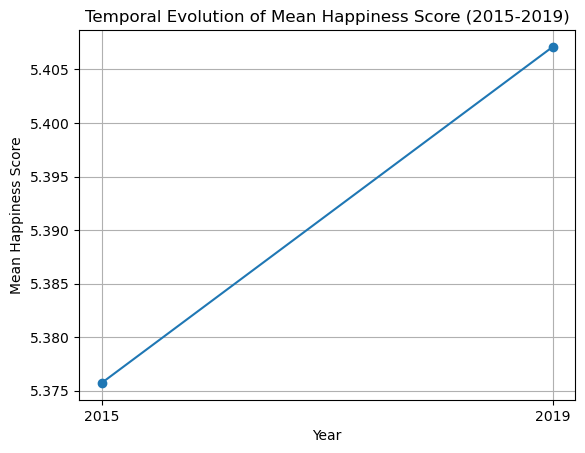

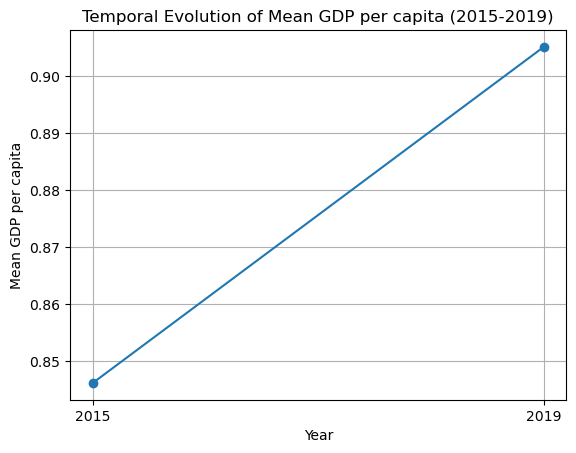

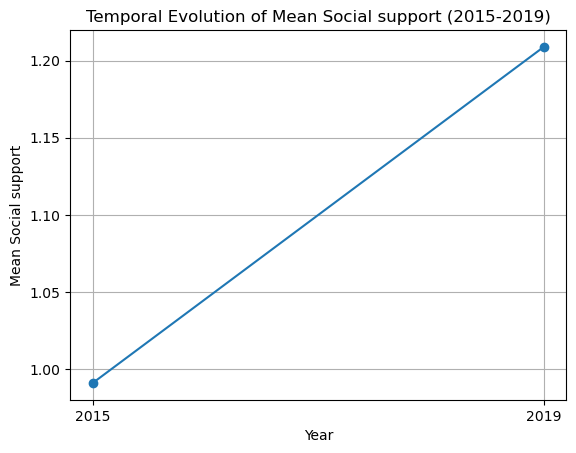

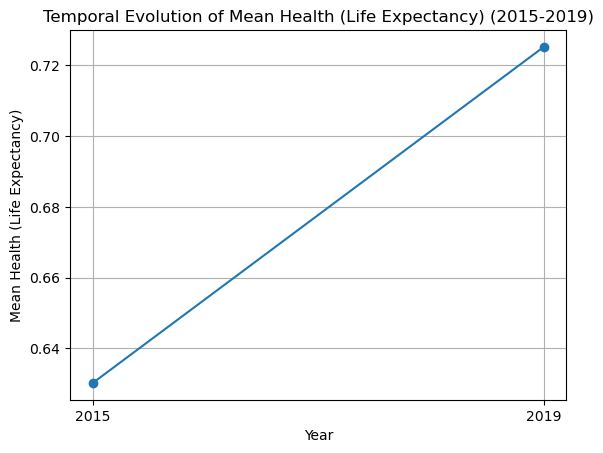

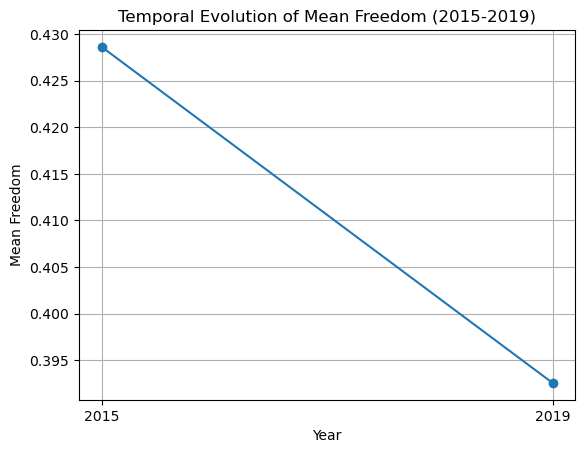

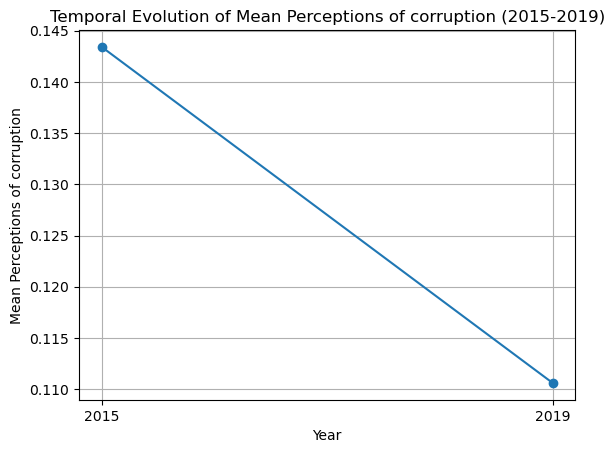

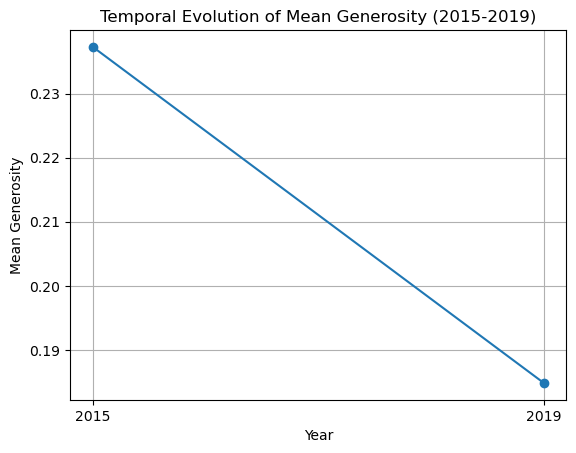

In [11]:
# I am not going to import libraries or define function seperately. In above cell data loading and other operations has already been performed so I will continue from next required operations

# Calculate the mean for each continuous variable for both years
means_2015 = data_2015[continuous_vars].mean() # this continuous variable has already been defined in above cell so dont get confused.
means_2019 = data_2019[continuous_vars].mean()

# Create a DataFrame to store the mean values for each year
means_df = pd.DataFrame({
    '2015': means_2015,
    '2019': means_2019
}).transpose()

# Lets plot  the temporal evolution of the mean
for var in continuous_vars:
    plt.figure()
    plt.plot(means_df.index, means_df[var], marker='o')
    plt.title(f'Temporal Evolution of Mean {var} (2015-2019)')
    plt.xlabel('Year')
    plt.ylabel(f'Mean {var}')
    plt.grid(True)
    plt.show()


Its clear from the graph that temporal mean for continuous variable 'Happiness Score', 'GDP per capita', 'Social support', 'Health (Life Expectancy)' has increased from 2015 to 2019. and temporal mean for 'Freedom', 'Perceptions of corruption', 'Generosity' has gone down from 2015 to 2019. This can be cross validated by looking at the mean value of both year that we calculted in question no.2

## 4) Generate two histograms in the same plt.figure, one for the Happiness Score in 2015 and another for the Happiness Score in 2019. Discuss any observed differences or similarities.



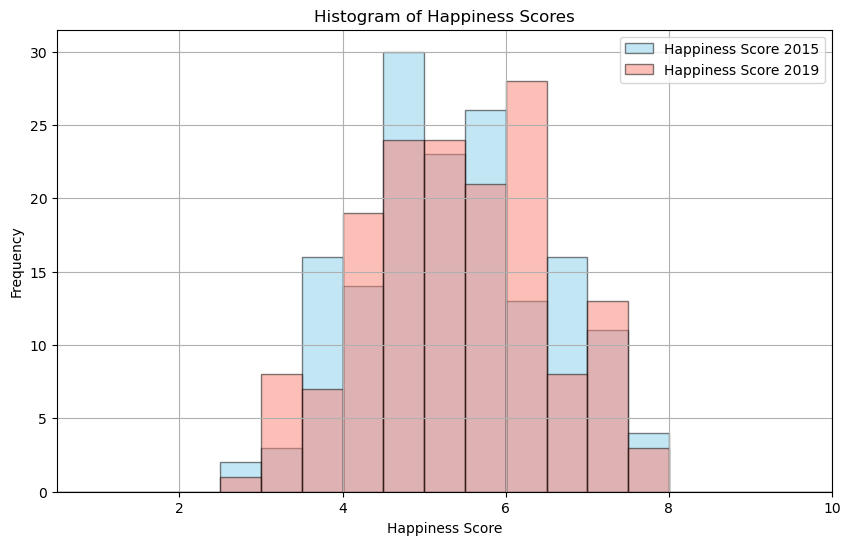

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Extract the happiness scores from both DataFrames
happiness_scores_2015 = data_2015['Happiness Score']
happiness_scores_2019 = data_2019['Happiness Score']

# Find the minimum value in the happiness scores
min_happiness_score = min(happiness_scores_2015.min(), happiness_scores_2019.min())

# Plotting the histogram with both sets of happiness scores
plt.hist(happiness_scores_2015, bins=20, range=(0, 10), color='skyblue', edgecolor='black', alpha=0.5, label='Happiness Score 2015')
plt.hist(happiness_scores_2019, bins=20, range=(0, 10), color='salmon', edgecolor='black', alpha=0.5, label='Happiness Score 2019')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.title('Histogram of Happiness Scores')
plt.legend()
plt.grid(True)
plt.xlim(0.5, max(10, min_happiness_score))  # Set the x-axis range to start from 0.5
plt.show()


In [13]:
#Lets cross check our histogram data 
# Filter the DataFrame for happiness scores between 4 and 5
filtered_data = data_2019[(data_2019['Happiness Score'] >= 6) & (data_2019['Happiness Score'] <= 6.5)]

# Count the number of rows in the filtered DataFrame
num_countries = len(filtered_data)

print("Number of countries with happiness index between 4 and 5:", num_countries)


Number of countries with happiness index between 4 and 5: 28


### Some observations by looking at above histogram plot:
1.In 2015, there are higher frequencies at certain scores (e.g., around 4.5 and 5.5) compared to 2019.

2.The range of happiness scores is similar in both years, spanning from around 3 to 8. This indicates that the extremes of happiness scores haven't changed dramatically.

## 5) Calculate the correlation coefficients between the Happiness_Index and the continuous variables (economy, social support, etc…).For each year, which variable has the highest and the lowest correlation with happiness?


In [14]:
# Since we have to find correlation between Happines_Index and Continuous variables so here we will define new continuous varibale that do not contain Happiness_Index
continuous_vars = ['GDP per capita', 'Social support', 'Health (Life Expectancy)', 'Freedom', 'Perceptions of corruption', 'Generosity']

# Calculate correlation for 2015
correlation_2015 = data_2015[['Happiness Score'] + continuous_vars].corr()['Happiness Score'][1:]

# Calculate correlation for 2019
correlation_2019 = data_2019[['Happiness Score'] + continuous_vars].corr()['Happiness Score'][1:]

# Find highest and lowest correlations for 2015
highest_corr_2015 = correlation_2015.idxmax()
lowest_corr_2015 = correlation_2015.idxmin()

# Find highest and lowest correlations for 2019
highest_corr_2019 = correlation_2019.idxmax()
lowest_corr_2019 = correlation_2019.idxmin()

# Lets print and check the result
print("2015 Correlations:")
print(correlation_2015)
print(f"Highest correlation in 2015: {highest_corr_2015} ({correlation_2015[highest_corr_2015]})")
print(f"Lowest correlation in 2015: {lowest_corr_2015} ({correlation_2015[lowest_corr_2015]})")

print("\n2019 Correlations:")
print(correlation_2019)
print(f"Highest correlation in 2019: {highest_corr_2019} ({correlation_2019[highest_corr_2019]})")
print(f"Lowest correlation in 2019: {lowest_corr_2019} ({correlation_2019[lowest_corr_2019]})")

2015 Correlations:
GDP per capita               0.780966
Social support               0.740605
Health (Life Expectancy)     0.724200
Freedom                      0.568211
Perceptions of corruption    0.395199
Generosity                   0.180319
Name: Happiness Score, dtype: float64
Highest correlation in 2015: GDP per capita (0.7809655268660222)
Lowest correlation in 2015: Generosity (0.180318526697175)

2019 Correlations:
GDP per capita               0.793883
Social support               0.777058
Health (Life Expectancy)     0.779883
Freedom                      0.566742
Perceptions of corruption    0.385613
Generosity                   0.075824
Name: Happiness Score, dtype: float64
Highest correlation in 2019: GDP per capita (0.7938828678781276)
Lowest correlation in 2019: Generosity (0.07582369490389744)


## Modelling (Use LinearRegression model from the scikit-learn library)


### 1) For each year in the dataset and for each factor create unidimensional linear models where the independent variable is one of the factors (economy, support etc ), and the dependent variable is the happiness score. Report the coefficients and intercept for each linear model and calculate the coefficient of determination (R^2) for each model.


In [15]:
# Lets import the required libraries to perform this task

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Continuous variables
continuous_vars = ['GDP per capita', 'Social support', 'Health (Life Expectancy)', 'Freedom', 'Perceptions of corruption', 'Generosity']

# Lets define a function with three arguments to perform linear regression and get the results
def perform_regression(data, year, variables):
    X = data[variables]
    y = data['Happiness Score']
    results = {}
    
    for var in variables:
        X_var = X[[var]].values.reshape(-1, 1)
        model = LinearRegression()
        model.fit(X_var, y)
        
        y_pred = model.predict(X_var)
        r2 = r2_score(y, y_pred)
        
        results[var] = {
            'coefficient': model.coef_[0],
            'intercept': model.intercept_,
            'R^2': r2
        }
    
    results_df = pd.DataFrame(results).transpose()
    results_df.index.name = f'Regression results for {year}'
    return results_df

# Perform regression for 2015
results_2015 = perform_regression(data_2015, 2015, continuous_vars)


# Perform regression for 2019
results_2019 = perform_regression(data_2019, 2019, continuous_vars)

# Print results
print("Regression results for 2015:")
print(results_2015)
print("\nRegression results for 2019:")
print(results_2019)

Regression results for 2015:
                             coefficient  intercept       R^2
Regression results for 2015                                  
GDP per capita                  2.218227   3.498810  0.609907
Social support                  3.113424   2.290188  0.548496
Health (Life Expectancy)        3.356093   3.260525  0.524465
Freedom                         4.317441   3.525214  0.322864
Perceptions of corruption       3.769816   4.835060  0.156182
Generosity                      1.629764   4.988999  0.032515

Regression results for 2019:
                             coefficient  intercept       R^2
Regression results for 2019                                  
GDP per capita                  2.218148   3.399345  0.630250
Social support                  2.890987   1.912430  0.603819
Health (Life Expectancy)        3.585367   2.806832  0.608218
Freedom                         4.402637   3.678751  0.321196
Perceptions of corruption       4.540336   4.904923  0.148697
Generosity 

## 2) Identify which variable explains the happiness score better by itself for each year. Is this variable the same for both years, or does it vary?


In [16]:
# Assuming the function perform_regression and the previous steps have been executed

# Find the variable with the highest R^2 value for each year
Happiness_2015 = results_2015['R^2'].idxmax()
Happiness_2019 = results_2019['R^2'].idxmax()

# Print the results
print(f"The variable that explains the happiness score best in 2015 is: {Happiness_2015} with an R^2 of {results_2015.loc[Happiness_2015, 'R^2']}")
print(f"The variable that explains the happiness score best in 2019 is: {Happiness_2019} with an R^2 of {results_2019.loc[Happiness_2019, 'R^2']}")

The variable that explains the happiness score best in 2015 is: GDP per capita with an R^2 of 0.6099071541531225
The variable that explains the happiness score best in 2019 is: GDP per capita with an R^2 of 0.6302500079104005


### From above code it shows that variable is same for both years

## 3) Build a multidimensional linear model using all the variables as independent variables and the happiness score as the dependent variable for each year. Then, compare the accuracy of the multidimensional model with the unidimensional models. Does the inclusion of all variables improve the accuracy of the model?


In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
# Define independent variables and dependent variable for 2015
X_2015 = data_2015[continuous_vars]
y_2015 = data_2015['Happiness Score']

# Train multidimensional linear model for 2015
model_2015 = LinearRegression()
model_2015.fit(X_2015, y_2015)

# Calculate R^2 and MSE for 2015
r2_2015 = model_2015.score(X_2015, y_2015)
mse_2015 = mean_squared_error(y_2015, model_2015.predict(X_2015))

# Define independent variables and dependent variable for 2019
X_2019 = data_2019[continuous_vars]
y_2019 = data_2019['Happiness Score']

# Train multidimensional linear model for 2019
model_2019 = LinearRegression()
model_2019.fit(X_2019, y_2019)

# Calculate R^2 and MSE for 2019
r2_2019 = model_2019.score(X_2019, y_2019)
mse_2019 = mean_squared_error(y_2019, model_2019.predict(X_2019))

# Print results
print("Results for the multidimensional linear model:")
print("For 2015:")
print(f"R^2: {r2_2015}")
print(f"MSE: {mse_2015}")
print("\nFor 2019:")
print(f"R^2: {r2_2019}")
print(f"MSE: {mse_2019}")

# Compare with unidimensional models
print("\nComparison with unidimensional models:")
print("R^2 for unidimensional models:")
print("2015:")
print(r2_2015)
print("2019:")
print(r2_2019)

Results for the multidimensional linear model:
For 2015:
R^2: 0.7772384894312989
MSE: 0.2902026549432948

For 2019:
R^2: 0.7791638079594221
MSE: 0.27186995749127063

Comparison with unidimensional models:
R^2 for unidimensional models:
2015:
0.7772384894312989
2019:
0.7791638079594221


## Inference and Hypothesis Testing
## 1) Consider the population to consist of all the countries listed. For the 2019 data, randomly select a sample of 30 countries from the population. Compute a 95% confidence interval for the sample mean of The Happiness score. 


In [19]:
from scipy.stats import t

# We will randomly select a sample of 30 countries from the 2019 data
np.random.seed(42)  
sample_2019 = np.random.choice(data_2019['Happiness Score'], size=30, replace=False)

# We will calculate sample mean and standard deviation for 2019
sample_mean = np.mean(sample_2019)
sample_std = np.std(sample_2019, ddof=1)  # Use Bessel's correction for sample standard deviation

# To calculate critical value for a 95% confidence level we will perform following task
alpha = 0.05 # learning rate 
df = len(sample_2019) - 1  # Degrees of freedom
t_critical = t.ppf(1 - alpha/2, df)

# Calculate margin of error
margin_of_error = t_critical * (sample_std / np.sqrt(len(sample_2019)))

# Construct confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

# Print results
print("95% Confidence Interval for the Sample Mean of the Happiness Score (2019):")
print(f"Sample Mean: {sample_mean}")
print(f"Margin of Error: {margin_of_error}")
print(f"Confidence Interval: {confidence_interval}")


95% Confidence Interval for the Sample Mean of the Happiness Score (2019):
Sample Mean: 5.4996
Margin of Error: 0.3731380069906591
Confidence Interval: (5.126461993009341, 5.872738006990659)


### 2) When constructing the dataset, various variables were considered, including the annual sunshine duration in hours for each country. Although the data was not ultimately included, we know that the standard deviation of the values was 200 hours. The newspaper claimed that the population average was 2500 hours or less. To investigate this claim, a new measurement was conducted last year on a small sample of 50 countries randomly selected, and the sample average was found to be 2580 hours.
### Formulate the null and alternative hypotheses to test the claim and determine whether this should be a one-sided or two-sided test. Based on the sampled data, state whether the null hypothesis should be rejected or not.


In [20]:

from scipy.stats import norm

# Sample statistics
sample_mean = 2580  # Sample mean
population_std = 200  # Population standard deviation
n = 50  # Sample size
mu_0 = 2500  # Claimed population average

# Calculate the test statistic z
z = (sample_mean - mu_0) / (population_std / np.sqrt(n))

# Significance level (alpha)
alpha = 0.05

# Critical value for one-sided test
critical_value = norm.ppf(1 - alpha) # this will calculate the critical value for a one-tailed hypothesis test using the normal distribution. 

# Print results
print("Test Statistic z:", z)
print("Critical Value:", critical_value)

# To determine if we should reject or accept the null hypothesis
if z > critical_value:
    print("Reject the null hypothesis. There is sufficient evidence to conclude that the population average is greater than 2500 hours.")
else:
    print("Fail to reject the null hypothesis. There is not sufficient evidence to conclude that the population average is greater than 2500 hours.")


Test Statistic z: 2.8284271247461903
Critical Value: 1.6448536269514722
Reject the null hypothesis. There is sufficient evidence to conclude that the population average is greater than 2500 hours.


# PART B - Forecasting air passengers. 
(dataset used: AirPassengers.csv)

Context:

Part B of this Assessment focuses on the famous 'Air Passengers' dataset, which provides monthly data on the number of air passengers from 1949 to 1960. This dataset is commonly used in time series analysis and forecasting tasks and it presents a valuable opportunity to study the trends and patterns in air travel over a specific time period, allowing for the exploration of various time series analysis techniques. This dataset is particularly useful in understanding the growth, seasonality, and long-term trends in air travel demand.

By analysing the 'Air Passengers' dataset, we can gain insights into the factors that influence air travel, identify patterns in passenger behaviour, and make predictions about future passenger numbers. This dataset is widely used in the field of transportation analysis, helping airlines, airports, and policymakers make informed decisions about capacity planning, marketing strategies, and resource allocation.




### 1. load the dataset and plot the time series. Which decomposition method do you think will be more appropriate for this dataset? Additive or multiplicative? Justify your answer. 


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/home/akanchha/Desktop/EDHEC/MSc-Data_Management_and_Business_Analytics/First_Trimester/12.1_AirPassengers.csv')

# Display the first few rows of the dataset
print(df.head())


     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


#### To understand which decomposition method  will be more appropriate for this dataset Additive or multiplicative , we'll plot the time series data to visualize it.

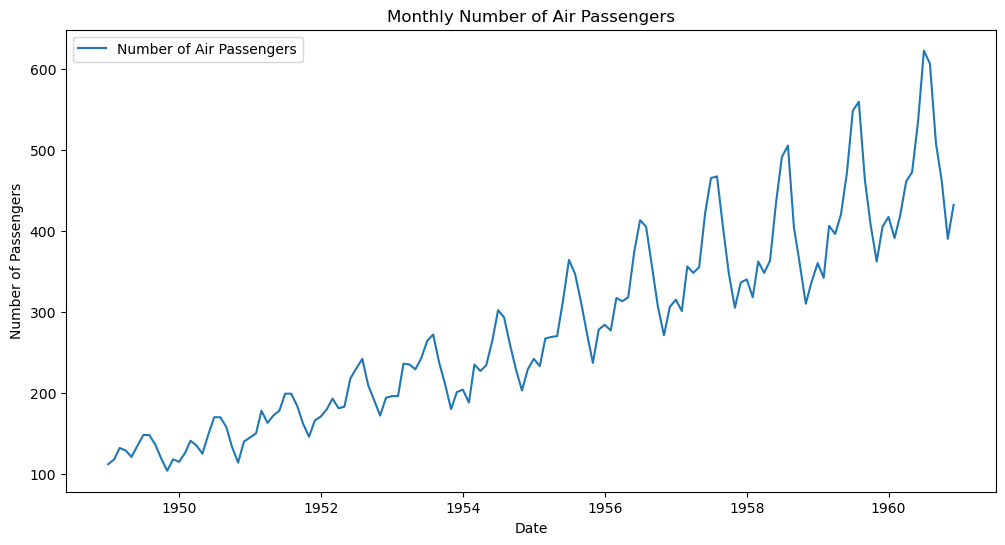

In [22]:
# Convert the 'Month' column to datetime format
df['Month'] = pd.to_datetime(df['Month'])

# Set the 'Month' column as the index
df.set_index('Month', inplace=True)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df['#Passengers'], label='Number of Air Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('Monthly Number of Air Passengers')
plt.legend()
plt.show()


By looking at the graph above the multiplicative decomposition method is more appropriate for this dataset because as the trend increases, the seasonal variations also increase in magnitude. The multiplicative model assumes that the seasonal and trend components are proportional to each other. This fits the observed pattern where higher values of the series are associated with larger seasonal effects.

### 2 Perform a seasonal decomposition of the "Air Passengers" dataset using the method that you selected as more appropriate in your previous answer. Visualize the trend, seasonality, and residual components. Make a plot (or several plots) to show all different components of the time series. 


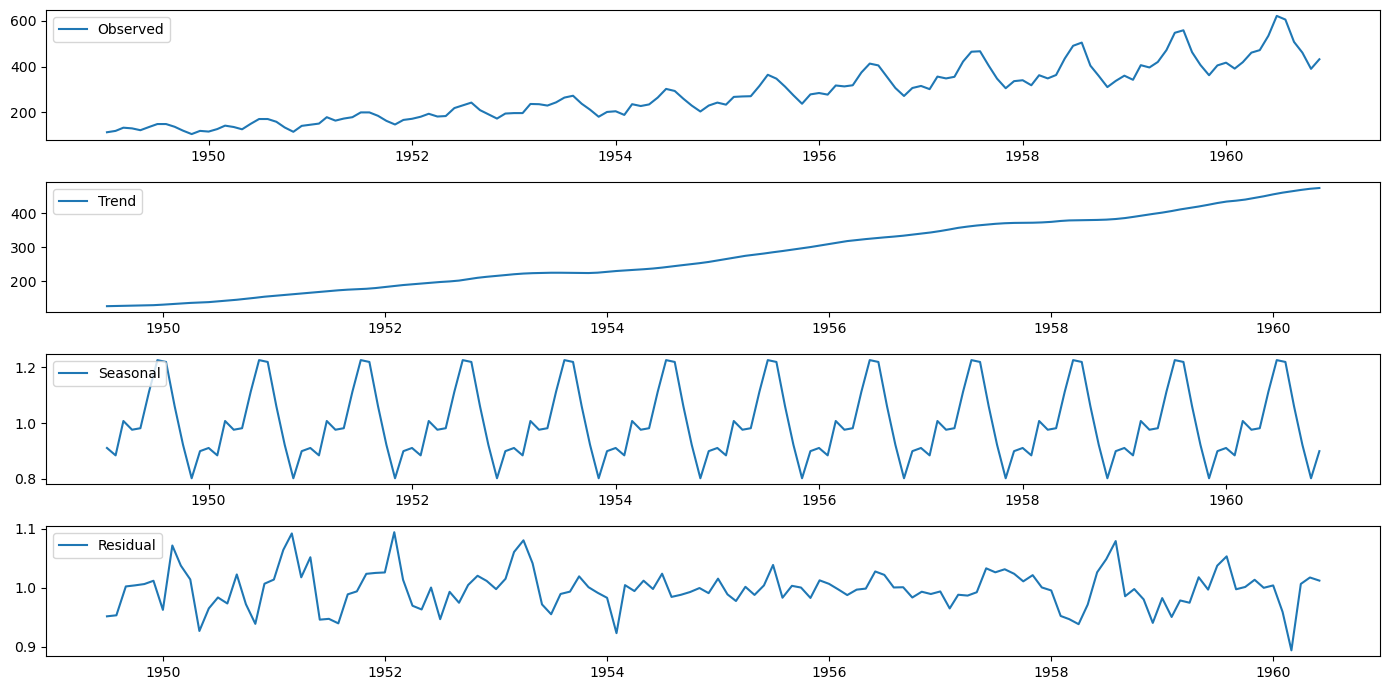

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform multiplicative decomposition
result_mul = seasonal_decompose(df['#Passengers'], model='multiplicative', period=12)

# Plot the decomposed components
plt.figure(figsize=(14, 7))

plt.subplot(411)
plt.plot(result_mul.observed, label='Observed')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(result_mul.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(result_mul.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(result_mul.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()



## 3* Can you estimate a prediction for the number of passengers in December 1961? 

To predict the number of passengers for December 1961, we can use time series forecasting methods. We can probably use ARIMA model. ARIMA means AutoRegressive Integrated Moving Average. It combines three components—autoregression (AR), differencing (I), and moving average (MA)—to capture the patterns in a time series and make predictions. 

In [29]:

from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
data = pd.read_csv('./12.1_AirPassengers.csv')
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
data = data.asfreq('MS')  # Set the frequency to monthly start

# Fit the ARIMA model
model = ARIMA(data['#Passengers'], order=(5, 1, 0))  # Using ARIMA(5,1,0) as a starting point
model_fit = model.fit()

# Forecast the number of passengers for the next 12 months
forecast = model_fit.forecast(steps=12)

# Display the forecasted value for December 1961
print(f"Forecast for December 1961: {forecast.iloc[-1]}")


Forecast for December 1961: 487.64095852242366
